<a href="https://colab.research.google.com/github/Felipe-Oliveira11/TensorFlow-Regularizers/blob/master/TensorFlow_Regularizadores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### TensorFlow Regularizers 


<br>
<hr>

In [1]:
!pip install mlxtend

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix


import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras.models import save_model
from tensorflow.keras.models import load_model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, InputLayer
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.losses import BinaryCrossentropy



from tensorflow.keras.regularizers import L1
from tensorflow.keras.regularizers import L2
from tensorflow.keras.regularizers import L1L2

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
np.random.seed(42)
tf.random.set_seed(42)

In [3]:
path = '/content/drive/My Drive/Machine Learning - Notebooks/Marketing /campaigns.csv'
marketing = pd.read_csv(path)
marketing.head()

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
class_names = ['Aceita', 'Recusada']

In [5]:
marketing.drop('Unnamed: 0', axis=1, inplace=True)


# label target 
label = LabelEncoder()
marketing['y'] = label.fit_transform(marketing[['y']])


# tipo de variáveis 
cat_cols = marketing.select_dtypes(include=['object']).columns 
num_cols = marketing.select_dtypes(include=['float64', 'int64']).columns



# encoding categóricas 
dummies = pd.get_dummies(marketing[cat_cols], prefix=cat_cols, drop_first=True)
marketing = pd.concat([marketing, dummies], axis=1)
marketing.drop(cat_cols, axis=1, inplace=True)
marketing.shape


# split 
X = marketing.drop('y', axis=1)
y = marketing['y']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)

# padronização
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

In [14]:
model = Sequential()
model.add(InputLayer(input_shape=(X_train.shape[1])))
model.add(Dense(units=20, activation='relu'))
model.add(BatchNormalization(axis=1))
model.add(Dense(units=20, activation='relu', kernel_regularizer=L1L2(l1=0.0001, l2=0.0001)))
model.add(Dense(units=1, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 20)                860       
_________________________________________________________________
batch_normalization_1 (Batch (None, 20)                80        
_________________________________________________________________
dense_5 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 21        
Total params: 1,381
Trainable params: 1,341
Non-trainable params: 40
_________________________________________________________________


In [15]:
optimizer = Adam(learning_rate=0.001)
loss = BinaryCrossentropy()
metrics = ['accuracy']


model.compile(optimizer=optimizer,
              loss=loss,
              metrics=metrics)

In [16]:
history = model.fit(X_train, y_train,
                    batch_size=128,
                    epochs=50,
                    validation_data=(X_test, y_test))

Epoch 1/50
223/223 [==============================] - 0s 2ms/step - loss: 0.3665 - accuracy: 0.8631 - val_loss: 0.2850 - val_accuracy: 0.8882
Epoch 2/50
223/223 [==============================] - 0s 1ms/step - loss: 0.2514 - accuracy: 0.9007 - val_loss: 0.2485 - val_accuracy: 0.8960
Epoch 3/50
223/223 [==============================] - 0s 2ms/step - loss: 0.2332 - accuracy: 0.9038 - val_loss: 0.2392 - val_accuracy: 0.8979
Epoch 4/50
223/223 [==============================] - 0s 2ms/step - loss: 0.2260 - accuracy: 0.9071 - val_loss: 0.2341 - val_accuracy: 0.8987
Epoch 5/50
223/223 [==============================] - 0s 1ms/step - loss: 0.2212 - accuracy: 0.9064 - val_loss: 0.2317 - val_accuracy: 0.8988
Epoch 6/50
223/223 [==============================] - 0s 2ms/step - loss: 0.2175 - accuracy: 0.9068 - val_loss: 0.2294 - val_accuracy: 0.8994
Epoch 7/50
223/223 [==============================] - 0s 2ms/step - loss: 0.2146 - accuracy: 0.9081 - val_loss: 0.2273 - val_accuracy: 0.9014
Epoch 

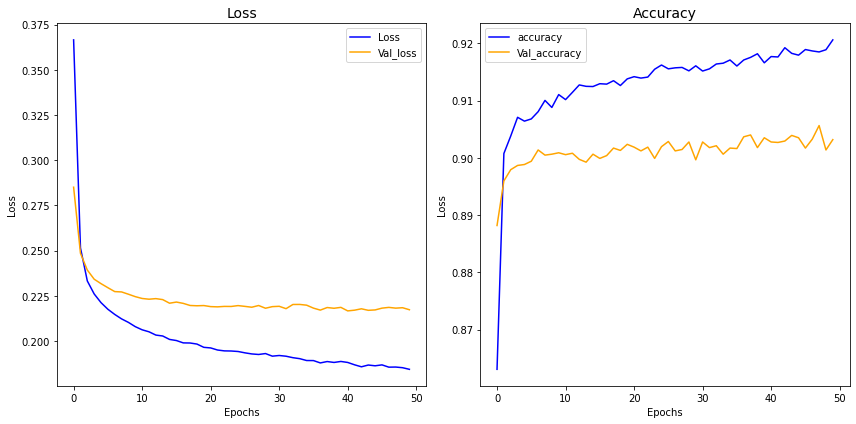

In [17]:
fig, ax = plt.subplots(1,2, figsize=(12,6))

# Loss 
ax[0].plot(history.epoch, history.history['loss'], color='blue', label='Loss')
ax[0].plot(history.epoch, history.history['val_loss'], color='orange', label='Val_loss')
ax[0].set_title('Loss', fontsize=14)
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].legend()



# Accuracy 
ax[1].plot(history.epoch, history.history['accuracy'], color='blue', label='accuracy')
ax[1].plot(history.epoch, history.history['val_accuracy'], color='orange', label='Val_accuracy')
ax[1].set_title('Accuracy', fontsize=14)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend()


plt.tight_layout()
plt.show()

In [18]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     10716
           1       0.00      0.00      0.00      1491

    accuracy                           0.88     12207
   macro avg       0.44      0.50      0.47     12207
weighted avg       0.77      0.88      0.82     12207



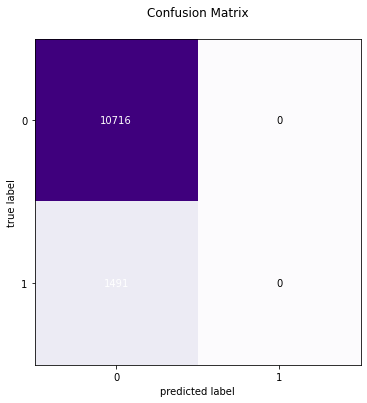

In [11]:
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=cm, figsize=(10,6), cmap='Purples')
plt.title('Confusion Matrix')
plt.show()

In [12]:
y_proba = model.predict_proba(X_test)

Instructions for updating:
Please use `model.predict()` instead.


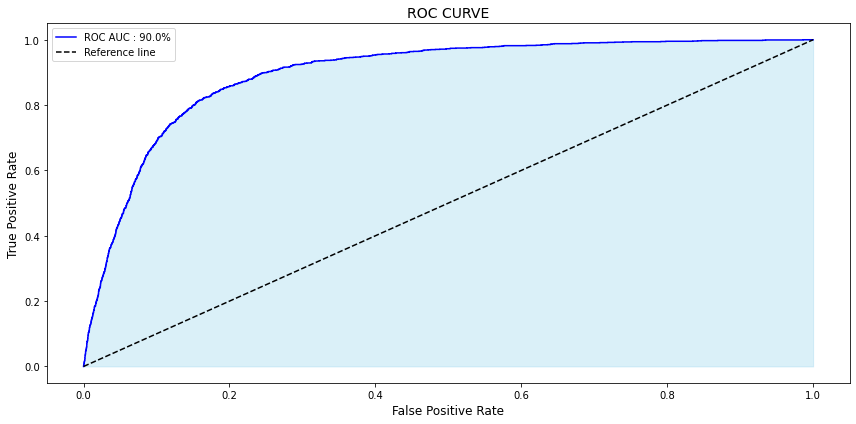

In [13]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

plt.figure(figsize=(12,6))
plt.plot(fpr, tpr, color='blue', label='ROC AUC : {}%'.format(round(roc_auc_score(y_test, y_proba)*100)))
plt.fill_between(fpr, tpr, color='skyblue', alpha=0.3)
plt.plot([0,1], [0,1], color='black', ls='--', label='Reference line')
plt.title('ROC CURVE', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()